## Домашнее творческое задание по дисциплине "Технологии обработки больших данных"

Выполнил: студент группы __ПМ20-4 Радайкин Артём Альбертович__

Вариант: __86__

    

In [1]:
pwd

'C:\\Users\\Артём\\OneDrive - ФГОБУ ВО Финансовый университет при Правительстве РФ\\Учёба\\3 курс\\Технологии обработки BD\\ДТЗ'

__Задание 1__. В файле `steam_games.json` находится информация об играх из магазина Steam. При помощи пакета `json` считайте файл. Выведите на экран количество игр, которые стоят (без скидки) более 40\$. В файле `steam_games.xml` находится информация об играх из магазина Steam. При помощи пакета `bs4` считайте файл. Выведите на экран количество игр, скидка на которые была больше 20\$.

In [2]:
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

C:\Users\Артём\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
with open(
    'C:\\Users\\Артём\\OneDrive - ФГОБУ ВО Финансовый университет при Правительстве РФ\\Учёба\\3 курс\\Технологии обработки BD\\ДТЗ\\data\\steam_games.json', 
    'r', encoding='utf-8'
) as fp:
    games_json = json.load(fp)
    
games_json;

### Выведите на экран количество игр, которые стоят (без скидки) более 40$. 

In [4]:
original_prices_json = [] # original_prices где цена игры > 40$
for game in games_json:
    if str(game['original_price']) != 'nan':
        if float(game['original_price'].split('$')[1]) > 40:
            original_prices_json.append(game['original_price'])
    
print(f'Количество игр, которые стоят (без скидки) более 40$ : {len(original_prices_json)}')

Количество игр, которые стоят (без скидки) более 40$ : 386


In [5]:
with open(
    'C:\\Users\\Артём\\OneDrive - ФГОБУ ВО Финансовый университет при Правительстве РФ\\Учёба\\3 курс\\Технологии обработки BD\\ДТЗ\\data\\steam_games.xml', 
    'r', encoding='utf-8'
) as fp:
    games_xml = BeautifulSoup(fp) 
    
games_xml;

### Выведите на экран количество игр, скидка на которые была больше 20$

In [82]:
discount_xml = []
for game in games_xml.findAll('game'):
    original_price = game.find('original_price').text
    discount_price = game.find('discount_price').text
    if str(original_price) != 'nan' and str(discount_price) != 'nan':
        discount = float(original_price.split('$')[1]) - float(discount_price.split('$')[1])
        if discount > 20:
            discount_xml.append(discount)
            
print(f'Количество игр, скидка на которые была больше 20$ : {len(discount_xml)}')  

Количество игр, скидка на которые была больше 20$ : 279


__Задание 2__. Преобразуйте данные из файла, предложенного в задании 1, в `pd.DataFrame` и свяжите его с переменной `games_df`. Удалите столбцы, содержащие более 65% пропусков. Сгруппируйте таблицу по столбцу `types`. Для каждой группы найдите среднее значение столбца `reviews_cnt`. Добавьте в таблицу столбец `interest`, заполненный по следующему правилу: если значение `reviews_cnt` для строки меньше, чем среднее по соответствующей группе, то в `interest` укажите `low`; иначе `high`.

In [7]:
games_df = pd.DataFrame(games_json)
games_df.head(2)

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,minimum_requirements,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows Xp / Vista / 7,Processor:...","Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Minimum:,OS:,Windows 7,Processor:,1.8 GHz,Memo...","Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0


In [8]:
games_df.shape

(10000, 23)

In [9]:
print("-"*30)
print("Missing values of each column in %")
print("-"*30)
print((games_df.isna().sum() / 10000) * 100 ) 

------------------------------
Missing values of each column in %
------------------------------
url                          0.00
types                        0.00
name                         0.02
desc_snippet                32.31
release_date                 7.94
developer                    0.76
publisher                   11.91
popular_tags                 0.00
game_details                 0.00
languages                    0.00
achievements                69.30
game_description             7.24
mature_content              92.97
minimum_requirements        48.78
recommended_requirements    48.78
original_price              19.86
discount_price              63.32
reviews_mood                 0.00
reviews_cnt                  0.00
genres                       0.00
avg_rating_users             0.00
avg_rating_critics           0.00
selled                      19.86
dtype: float64


### Таким образом удаляем два столбца: achievements, mature_content

In [10]:
games_df.drop(['achievements', 'mature_content'], axis=1, inplace=True)

In [11]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       10000 non-null  object 
 1   types                     10000 non-null  object 
 2   name                      9998 non-null   object 
 3   desc_snippet              6769 non-null   object 
 4   release_date              9206 non-null   object 
 5   developer                 9924 non-null   object 
 6   publisher                 8809 non-null   object 
 7   popular_tags              10000 non-null  object 
 8   game_details              10000 non-null  object 
 9   languages                 10000 non-null  object 
 10  game_description          9276 non-null   object 
 11  minimum_requirements      5122 non-null   object 
 12  recommended_requirements  5122 non-null   object 
 13  original_price            8014 non-null   object 
 14  discoun

### Сгруппируйте таблицу по столбцу types. Для каждой группы найдите среднее значение столбца reviews_cnt.

In [12]:
group_games = games_df.groupby('types')['reviews_cnt'].mean().reset_index()
group_games.rename(columns={'reviews_cnt':'mean_reviews'}, inplace=True)
group_games

,types,mean_reviews
0,app,10281.925524
1,bundle,10446.136578
2,sub,10057.758621


In [13]:
games_new_df = games_df.merge(group_games, right_on='types', left_on='types')
games_new_df.head(2)

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,mean_reviews
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0,10281.925524
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0,10281.925524


### Добавьте в таблицу столбец interest, заполненный по следующему правилу: если значение reviews_cnt для строки меньше, чем среднее по соответствующей группе, то в interest укажите low; иначе high.

In [14]:
games_new_df['interest'] = np.where(games_new_df['reviews_cnt'] > games_new_df['mean_reviews'], 'high', 'low')
games_df = games_new_df.drop(['mean_reviews'], axis=1)
games_df.head(2)

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,interest
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0,low
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0,low


__Задание 3__. Выберите из таблицы `games_df` столбцы `avg_rating_users` и `avg_rating_critics`. Преобразуйте полученный набор данных в массив `numpy`. Известно, что существуют такие $i\in I$ и $j \in I$, что $u_i+c_j = 131$. Найдите хотя бы одну пару $(i, j)$, выведите ее на экран, а также выведите на экран элементы, дающие эту сумму. Здесь где $u_i$ - значение столбца `avg_rating_users` для $i$-й строчки; $c_j$ - значение столбца `avg_rating_critics` для $j$-й строчки; $I$ - множество номеров строк.

In [15]:
np_array = np.array([games_df['avg_rating_users'], games_df['avg_rating_critics']]).T
np_array

array([[77, 63],
       [94, 49],
       [58, 98],
       ...,
       [97, 76],
       [ 3, 29],
       [82, 26]], dtype=int64)

In [16]:
# Нахожу все такие i == j, что u_i + c_j = 131
arr_ind_131 = np.where(np_array[:,0] + np_array[:,1] == 131)

# Пример такой пары:
print(f'(i,j) = ({arr_ind_131[0][0]},{arr_ind_131[0][0]})\nu_i = {np_array[arr_ind_131[0][0],0]}, c_j = {np_array[arr_ind_131[0][0],1]}')

(i,j) = (20,20)
u_i = 61, c_j = 70


__Задание 4__. Преобразуйте столбец `original_price` в числовой. Удалите строки, в которых значение в данном столбце больше, чем величина 3 квартиля столбца. Проведите [min-max нормализацию](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization) столбцов `original_price` и `selled`. Постройте диаграмму рассеяния на основе двух этих столбцов. Сделайте цвет точек черным, размер точек - 5. Добавьте подписи осей (вертикальной и горизонтальной) и заголовок рисунка. Проведите прямую линию от точки (0, 1) до (1, 0). Сделайте эту линию красной и пунктирной.

In [17]:
games_df['original_price']

0        $3.99
1       $14.99
2       $14.99
3        $9.99
4          NaN
         ...  
9995    $19.99
9996     $4.99
9997     $2.99
9998    $24.99
9999    $19.99
Name: original_price, Length: 10000, dtype: object

### Преобразуйте столбец original_price в числовой.

In [18]:
games_df['original_price'] = games_df['original_price'].str.split('$', expand=True).iloc[:,1].astype(float)
games_df['original_price']

0        3.99
1       14.99
2       14.99
3        9.99
4         NaN
        ...  
9995    19.99
9996     4.99
9997     2.99
9998    24.99
9999    19.99
Name: original_price, Length: 10000, dtype: float64

### Удалите строки, в которых значение в данном столбце больше, чем величина 3 квартиля столбца.

In [19]:
games_df['original_price']

0        3.99
1       14.99
2       14.99
3        9.99
4         NaN
        ...  
9995    19.99
9996     4.99
9997     2.99
9998    24.99
9999    19.99
Name: original_price, Length: 10000, dtype: float64

In [20]:
q_75 = games_df['original_price'].quantile(0.75)
games_df = games_df[games_df['original_price'] <= q_75]

In [21]:
games_df.shape

(6062, 22)

### Проведите [min-max нормализацию](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization) столбцов original_price и selled.

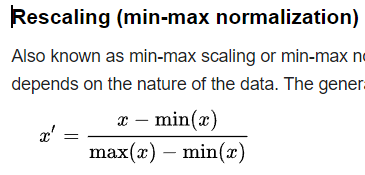

In [22]:
games_df['selled'] = (games_df['selled'] - games_df['selled'].min()) / (games_df['selled'].max() - games_df['selled'].min())
games_df['original_price'] = (games_df['original_price'] - games_df['original_price'].min()) / (games_df['original_price'].max() - games_df['original_price'].min())

games_df.head(2)

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,interest
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",0.301784,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,0.730229,low
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",0.767261,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,0.264597,high


### Постройте диаграмму рассеяния на основе двух этих столбцов. Сделайте цвет точек черным, размер точек - 5. Добавьте подписи осей (вертикальной и горизонтальной) и заголовок рисунка. Проведите прямую линию от точки (0, 1) до (1, 0). Сделайте эту линию красной и пунктирной.

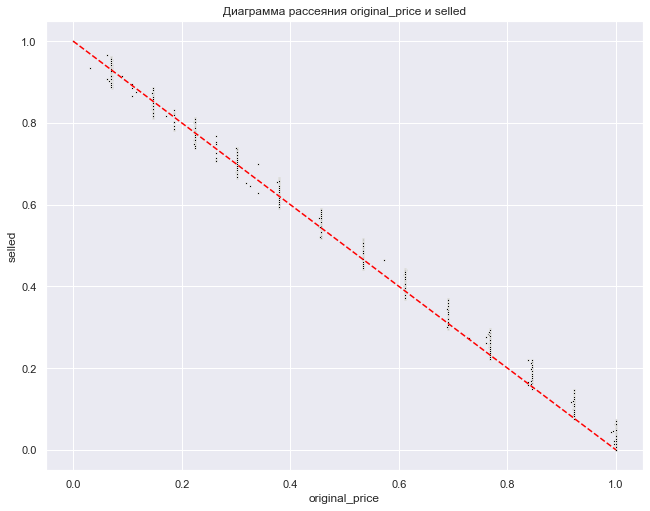

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
x = [0, 1]
y = [1, 0]

sns.set(font_scale=1.3)
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns_plot = sns.scatterplot(data = games_df, x = "original_price", y = "selled", s=5, color='black')\
                .set_title('Диаграмма рассеяния original_price и selled')

sns.lineplot(x, y, color='red').lines[0].set_linestyle("--");
#sns_plot.figure.savefig("output.png")

__Задание 5__. Для каждого описания из столбца `game_description` таблицы `games_df` при помощи регулярных выражений выясните, содержатся ли в нем символы '#', '[', ']', '“' или '%'. Добавьте 2 столбца: `has_special_symbols` и `n_special_symbols`. В столбце  `has_special_symbols` укажите True, если хотя бы один из указанных символов содержится в описании и False в противном случае. В столбце `n_special_symbols` укажите количество таких символов в строке.

In [24]:
import re
patt = re.compile(r'[[#\]“%]')
result = games_df['game_description'].str.findall(patt)
result[np.where(((result.str.len() != 0) & (result.notna())), True, False)]

<ipython-input-24-aeb25560b52c>:2: FutureWarning: Possible nested set at position 1
  patt = re.compile(r'[[#\]“%]')


0                [“]
30               [“]
80               [“]
140              [“]
143     [#, #, #, #]
            ...     
9269          [[, ]]
9284             [“]
9290             [“]
9292             [“]
9294             [“]
Name: game_description, Length: 603, dtype: object

In [25]:
patt = re.compile(r'[[#\]“%]')
result = games_df['game_description'].str.findall(patt)
games_df['has_special_symbols'] = np.where(((result.str.len() != 0) & (result.notna())), True, False)
games_df['n_special_symbols'] = np.where(((result.str.len() != 0) & (result.notna())), result.str.len(), np.nan)

In [26]:
games_df['n_special_symbols'].notna().sum()

603

In [27]:
games_df.head(2)

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,interest,has_special_symbols,n_special_symbols
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,0.730229,low,True,1.0
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,0.264597,high,False,NaN


__Задание 6__. Сохрание текущее состояние `games_df` в рабочую книгу "games.xlsx". Для каждого числового столбца при помощи протягиваемых формул Excel найдите среднее значение элементов в столбце. Поместите результаты вычислений после таблицы с данными. Добавьте в строку со средними значениями цветовую шкалу от синего (ближе к минимуму) до зеленого (ближе к максимуму). Создайте лист "Визуализация" и разместите на нем рисунок из задания 4, начиная с ячейки "F3". Вставьте в ноутбук скриншоты листов Excel, подтверждающие корректность выполнения задания.

* Примечание: для выявления типа столбца в Excel вы можете воспользоваться функций ЕЧИСЛО и проверить первый элемент в соответствующем столбце.

### Добавьте в строку со средними значениями цветовую шкалу от синего (ближе к минимуму) до зеленого (ближе к максимуму).

In [69]:
import xlsxwriter
import xlwings as xw

workbook = xlsxwriter.Workbook('games.xlsx')
worksheet = workbook.add_worksheet('Games')

worksheet.conditional_format('B6068:Y6068', {'type': '2_color_scale',
                                         'min_color': '#0000CD',
                                         'max_color': '#00FF00'})

workbook.close()

### Сохрание текущее состояние games_df в рабочую книгу "games.xlsx".

In [75]:
from openpyxl import load_workbook

book = load_workbook('games.xlsx')
writer = pd.ExcelWriter('games.xlsx', engine='openpyxl') 
writer.book = book

games_df.to_excel(writer, sheet_name="Games")

writer.close()
book.close()

###  Для каждого числового столбца при помощи протягиваемых формул Excel найдите среднее значение элементов в столбце. Поместите результаты вычислений после таблицы с данными.

In [73]:
workbook = xw.Book('games.xlsx')
worksheet = workbook.sheets['Games']

worksheet.range('A6068').value = 'Среднее значение'
worksheet.range('B6068:Y6068').formula = '=IF(ISNUMBER(B2)=TRUE, AVERAGE(B2:B6063),"")'


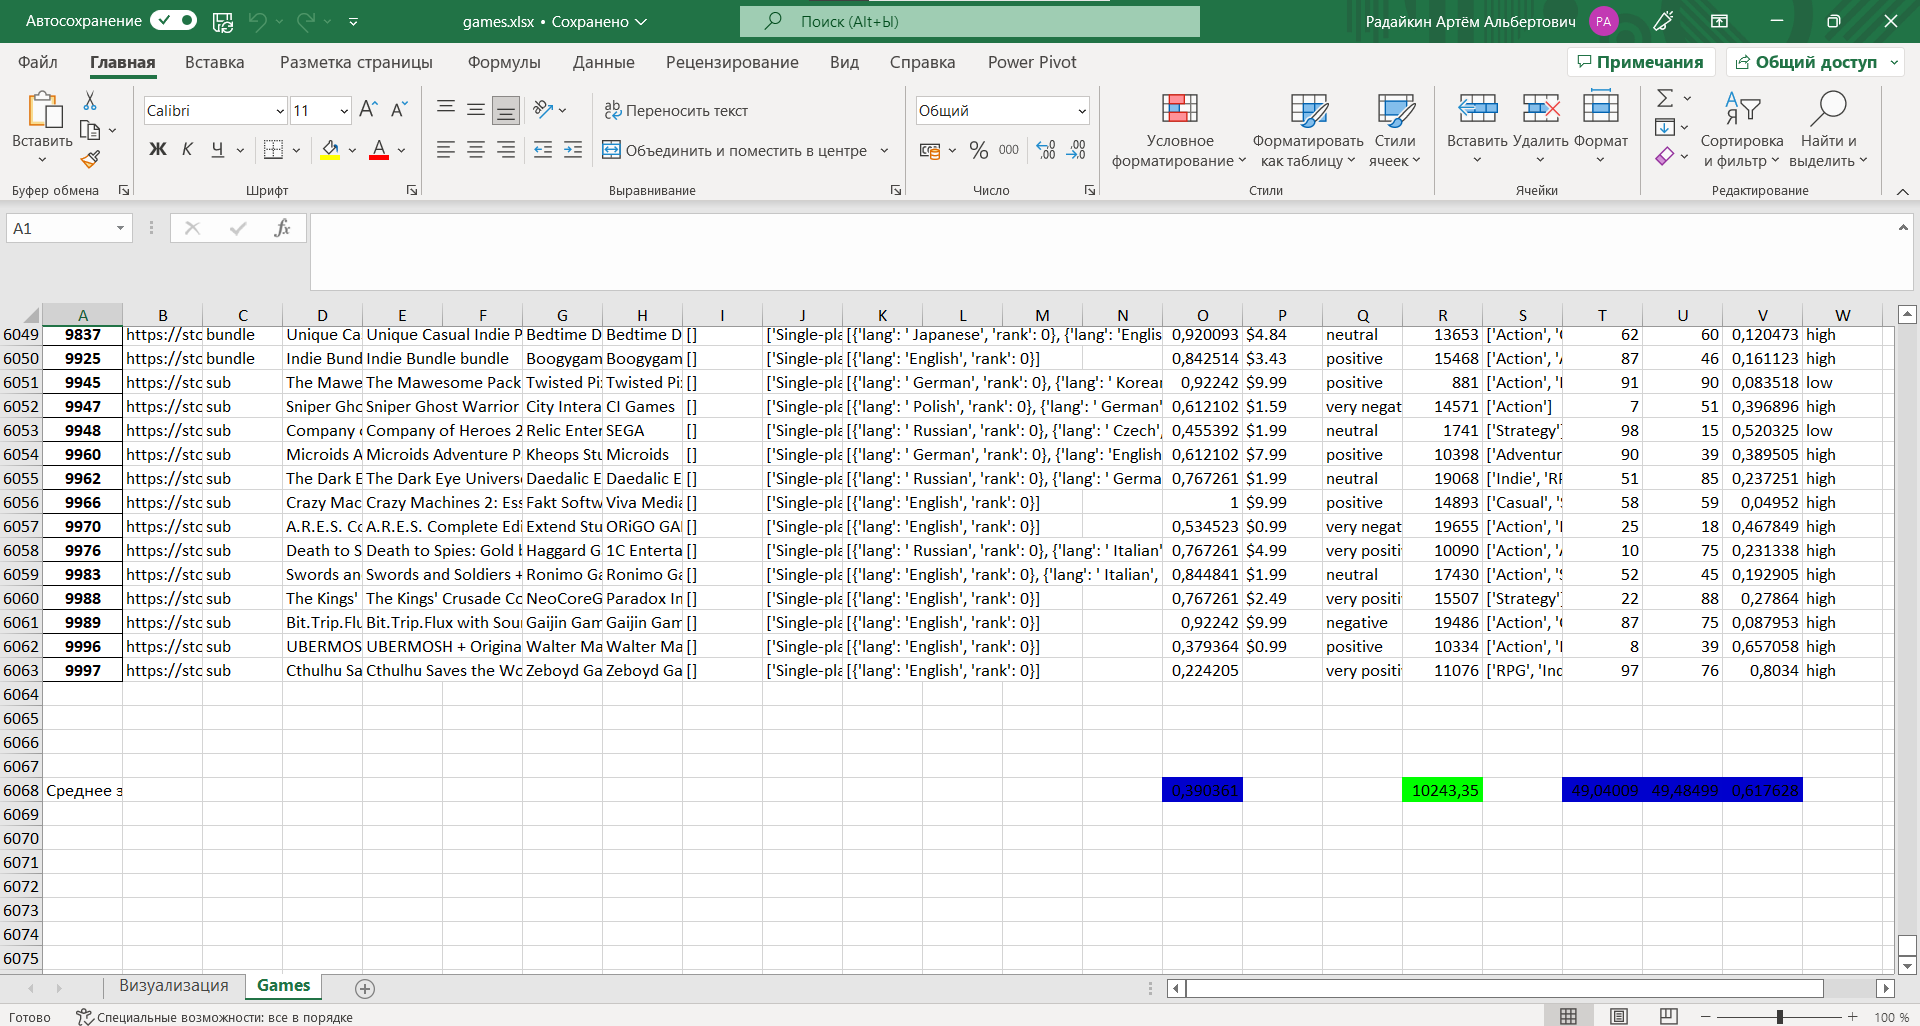

### Создайте лист "Визуализация" и разместите на нем рисунок из задания 4, начиная с ячейки "F3". Вставьте в ноутбук скриншоты листов Excel, подтверждающие корректность выполнения задания.

In [80]:
workbook.sheets.add('Визуализация')
worksheet_2 = workbook.sheets['Визуализация']

worksheet_2.pictures.add(sns_plot.get_figure(), name='Диаграмма_рассеяния.jpeg', 
                       update=True, 
                       left=worksheet_2.range('F3').left,
                       top=worksheet_2.range('F3').top,
                       scale = 0.8)

<Picture 'Диаграмма_рассеяния.jpeg' in <Sheet [games.xlsx]Визуализация>>

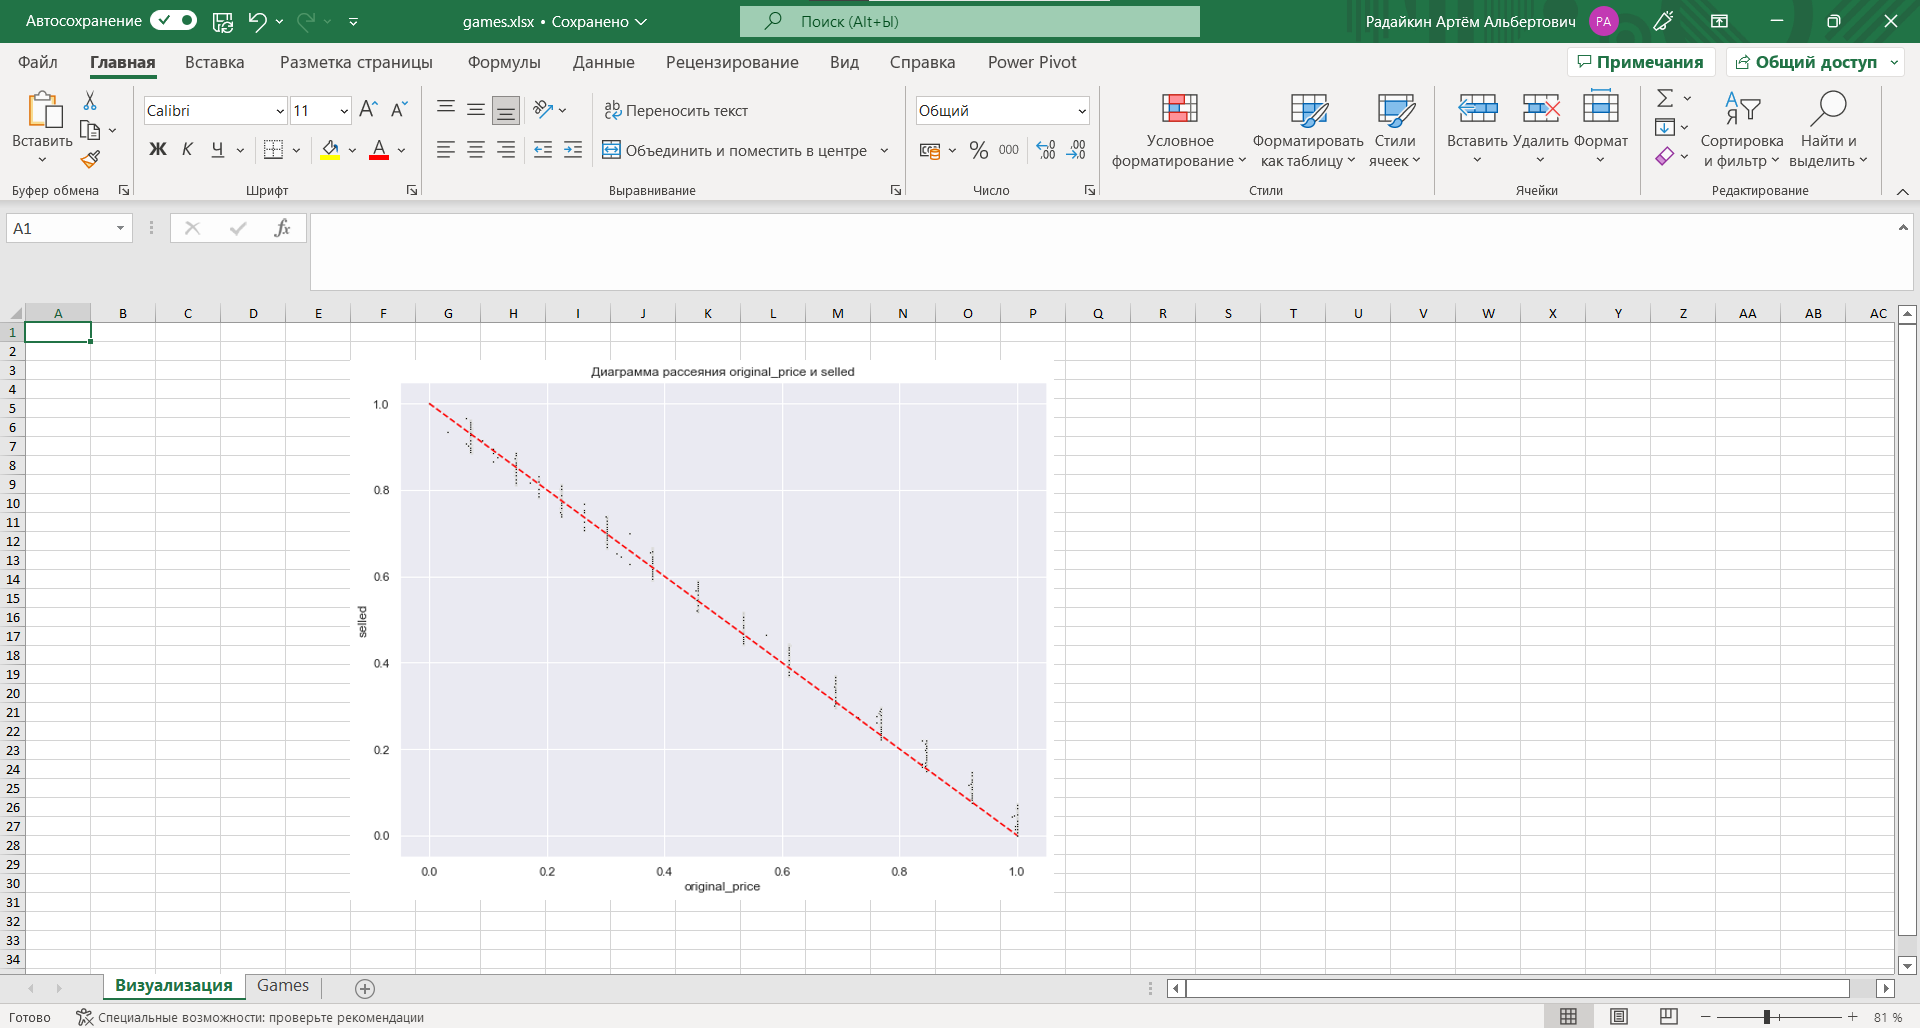

In [81]:
workbook.save()
workbook.close()